# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2004980
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [51 66 62 52 58 56 68 62 63 62]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [51 66 62 52 58 56 68 62 63 62]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


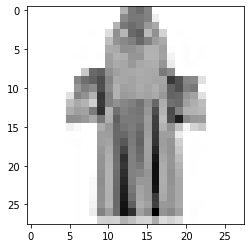

LABEL: 3
INPUT:


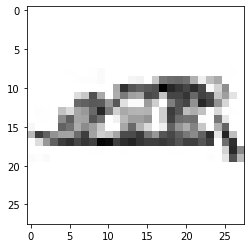

LABEL: 5
INPUT:


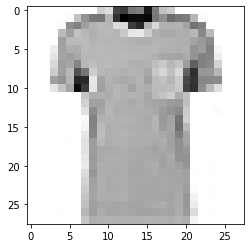

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
import pandas as pd

# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE
grid_cv = GridSearchCV(mlp, parameters, cv=5)
grid_cv.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:", grid_cv.best_params_)

print("Score with best parameters:", grid_cv.best_score_)

print("\nAll scores on the grid:")
pd.DataFrame(grid_cv.cv_results_)

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (30,)}
Score with best parameters:
0.7616666666666667

All scores on the grid:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.507303      1.105121         0.000599        0.001198   
1       3.258398      1.519089         0.000999        0.001997   
2       3.646832      1.427800         0.002996        0.001548   
3       1.369650      0.471196         0.005517        0.005284   
4       1.819906      0.358440         0.005321        0.005716   

  param_hidden_layer_sizes                                params  \
0                    (10,)         {'hidden_layer_sizes': (10,)}   
1                    (20,)         {'hidden_layer_sizes': (20,)}   
2                    (30,)         {'hidden_layer_sizes': (30,)}   
3                 (20, 20)      {'hidden_layer_sizes': (20, 20)}   
4             (30, 30, 20)  {'hidden_layer_sizes': (30, 30, 20)}   

   split0_test_score  split1_test_score  sp

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE
mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1, hidden_layer_sizes=(30,))

grid_cv = GridSearchCV(mlp, parameters, refit = True, verbose = 0, cv=kf)
grid_cv.fit(X_train,y_train)

#ADD YOUR CODE

print("Best parameters set found:", grid_cv.best_params_)

print("Score with best parameters:", grid_cv.best_score_)

print("\nAll scores on the grid:")
pd.DataFrame(grid_cv.cv_results_)

Best parameters set found:
{'batch_size': 480}
Score with best parameters:
0.735

All scores on the grid:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     120.143042     35.293061         0.004198        0.002558   
1       3.298696      0.595595         0.004744        0.005765   
2       2.161247      0.378366         0.001599        0.001958   

  param_batch_size               params  split0_test_score  split1_test_score  \
0                1    {'batch_size': 1}           0.075000           0.133333   
1               32   {'batch_size': 32}           0.691667           0.733333   
2              480  {'batch_size': 480}           0.758333           0.766667   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.133333           0.091667              0.075         0.101667   
1           0.708333           0.666667              0.700         0.700000   
2           0.725000           0.775000              0.650     

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

**Answer:** We can observe that there is a significant descent in the accuracy after the training when using a large batch size. When we increase the number of parameters of the model, we get more reliable accuracy after the training phase. We can see that the test score is always higher for batch size = 480. However, it takes too much time to train the model.

## [ANSWER TO QUESTION 1]

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 1.68 sec

Training MLP of size (20,) ...
Done, training time: 5.52 sec

Training MLP of size (30,) ...
Done, training time: 6.52 sec

Training MLP of size (30, 20) ...
Done, training time: 3.67 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 1.88 sec



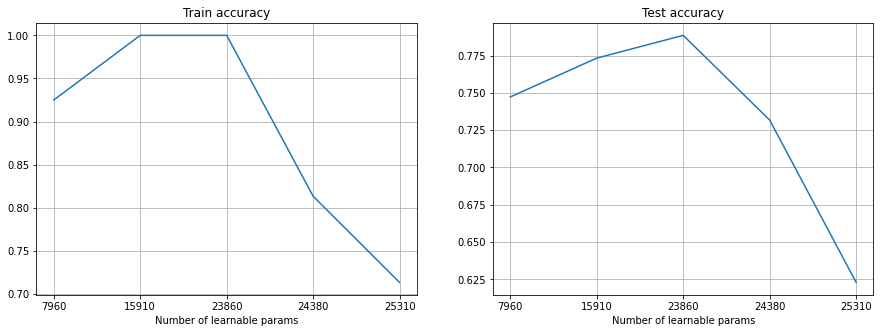

In [11]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=hl_size,
                    learning_rate_init=.1)
    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

We can see that higher accuracy is for (30,) single hidden layer. The overfitting has occurred in (20,) and (30,) for the training phase because the accuracy of the training reaches 1.00. Underfitting occurs when the difference between training accuracy and test accuracy is getting larger. For (10,) and (20,), we can observe that the difference between training accuracy and test accuracy are (0.93 - 0.75 = 0.18) and (1.00 - 0.775 = 0.225). After we examine the differences, we can see that there is an underfitting on the (20,) hidden layer.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


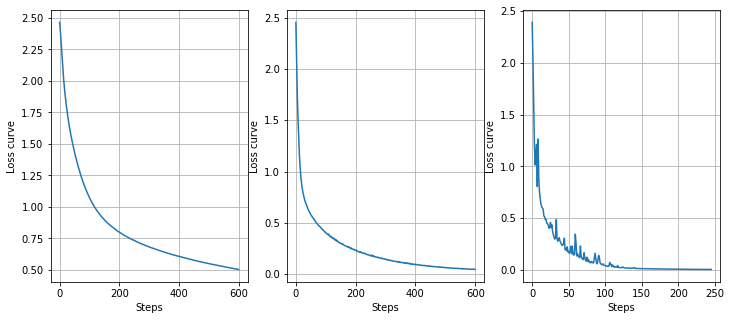

In [18]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.001, 0.01, 0.1]
# lr_list = [10**exp for exp in range(-3,0)]
scores = []
loss=[]

for lr in lr_list:
    
    mlp_best = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4,
                             random_state=ID, hidden_layer_sizes=(30, ), batch_size=480, learning_rate_init=lr)
    mlp_best.fit(X_train,y_train)
    scores.append(mlp_best.score(X_train,y_train))
    loss.append(mlp_best.loss_curve_)


fig, ax = plt.subplots(1,3,figsize=(12,5))

ax[0].plot(loss[0])
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Loss curve')
ax[0].grid(True)

ax[1].plot(loss[1])
ax[1].set_xlabel('Steps')
ax[1].set_ylabel('Loss curve')
ax[1].grid(True)

ax[2].plot(loss[2])
ax[2].set_xlabel('Steps')
ax[2].set_ylabel('Loss curve')
ax[2].grid(True)

plt.show()

In [17]:
lr_list = [0.001, 0.01, 0.1]
mlp_best = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, hidden_layer_sizes=(30, ), batch_size=480)
parameters= {'learning_rate_init' : lr_list}
clf_best=GridSearchCV(mlp_best, parameters, cv=kf, return_train_score=True)
clf_best.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:", clf_best.best_params_)

print("Score with best parameters:", clf_best.best_score_)

C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multi

RESULTS FOR NN

Best parameters set found: {'learning_rate_init': 0.01}
Score with best parameters: 0.7450000000000001


C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

When we analyze the plots, we can see that plot 1 and plot 2 have similar curves. However, plot 2 gives a lower loss than plot 1. Plot 2 gives the same loss with less iteration that means lr=0.1 has a better speed of convergence but lr=0.01 has more accuracy score than lr=0.1. The best accuracy score is found 0.745 for the model with a learning rate= 0.01.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.

C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(



RESULTS FOR BEST NN

Best NN training error: 0.001667
Best NN test error: 0.225750


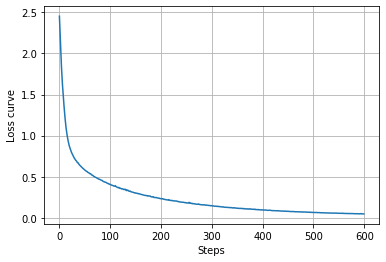

In [19]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_model = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4,
                           random_state=ID, hidden_layer_sizes=(30, ), batch_size=480, learning_rate_init=0.01)
best_model.fit(X_train,y_train)

training_error=1-best_model.score(X_train,y_train)
test_error=1-best_model.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
plt.plot(best_model.loss_curve_)
plt.xlabel('Steps')
plt.ylabel('Loss curve')
plt.grid(True)

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [20]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [425 403 397 364 389 376 438 410 397 401]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [21]:
# use best architecture and params from before

#ADD YOUR CODE

best_model_2 = MLPClassifier(max_iter=50, alpha=1e-4, solver='sgd',tol=1e-4, random_state=ID,
                             hidden_layer_sizes=(30, ), batch_size=480, learning_rate_init=0.01,verbose=True)
best_model_2.fit(X_train,y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error=1-best_model_2.score(X_train,y_train)
test_error=1-best_model_2.score(X_test,y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

Iteration 1, loss = 2.18825265
Iteration 2, loss = 1.62769361
Iteration 3, loss = 1.26704782
Iteration 4, loss = 1.03457066
Iteration 5, loss = 0.90812546
Iteration 6, loss = 0.83686414
Iteration 7, loss = 0.78949724
Iteration 8, loss = 0.75518685
Iteration 9, loss = 0.72691475
Iteration 10, loss = 0.70366264
Iteration 11, loss = 0.68382630
Iteration 12, loss = 0.66553001
Iteration 13, loss = 0.65096102
Iteration 14, loss = 0.63810204
Iteration 15, loss = 0.62206208
Iteration 16, loss = 0.61163712
Iteration 17, loss = 0.59968079
Iteration 18, loss = 0.59000778
Iteration 19, loss = 0.57924429
Iteration 20, loss = 0.57107873
Iteration 21, loss = 0.56347449
Iteration 22, loss = 0.55414745
Iteration 23, loss = 0.54694236
Iteration 24, loss = 0.54042102
Iteration 25, loss = 0.53385650
Iteration 26, loss = 0.52897283
Iteration 27, loss = 0.52030087
Iteration 28, loss = 0.51579058
Iteration 29, loss = 0.51010234
Iteration 30, loss = 0.50633077
Iteration 31, loss = 0.50022935
Iteration 32, los

C:\Users\yukse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


NN training error: 0.144500
NN test error: 0.173946


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

After we increase the number of samples, training error increases 0.001667 to 0.144500. This causes because we are using more data in training. However, more important thing is test error which decreases 0.225750 to 0.173946.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


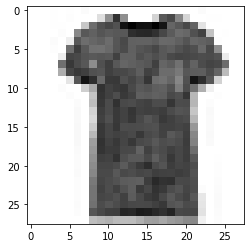

LABEL: 0


In [22]:
misclass=[]

NN_prediction = best_model.predict(X_test)
large_NN_prediction = best_model_2.predict(X_test)

for i in range(len(y_train)):
    if (NN_prediction[i] != y_test[i]) and (large_NN_prediction[i] == y_test[i]):
        misclass.append(i)
    
plot_input(X_test,y_test,np.random.choice(misclass, 1))

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


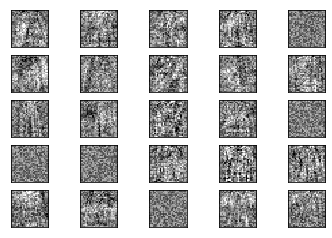

Weights with 4000 data points:


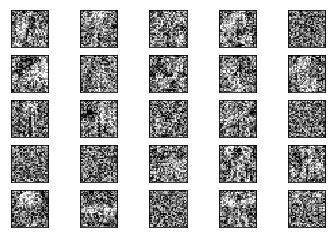

In [25]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(5, 5)
vmin, vmax = best_model.coefs_[0].min(), best_model.coefs_[0].max()
for coef, ax in zip(best_model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(5, 5)
vmin, vmax = best_model_2.coefs_[0].min(), best_model_2.coefs_[0].max()
for coef, ax in zip(best_model_2.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

We can observe that we can recognize some clothes from the images more easily for 4000 data points. We degrade noises a bit by using 4000 data points.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [29]:
m_training = 4000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(C = 100, gamma = 0.005, kernel = 'rbf') #best is to do 4 (rbf)
best_SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1 - best_SVM.score(X_train, y_train)
print("Training error SVM:", SVM_training_error)


SVM_test_error = 1 - best_SVM.score(X_test, y_test)
print("Test error SVM:", SVM_test_error)


RESULTS FOR SVM
Training error SVM: 0.00024999999999997247
Test error SVM: 0.15525


In [30]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C = 1)

regL2.fit(X_train, y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1 - regL2.score(X_train, y_train)
print ("Training error (reg): %f" % training_error)

test_error =  1 - regL2.score(X_test, y_test)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.062750
Test error (reg): 0.179750


C:\Users\yukse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

The best training error is 0.00024999999999997247 for SVM. Also, the best test error is 0.15525 for SVM. I will use the same training sample for them, and we can see that SVM achieves the best results.